In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/BBC News Train.csv')
test=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/BBC News Test.csv')

In [3]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [22]:
train_x=list(train['Text'])
test_x=list(test['Text'])
train_y=list(train['Category'])

In [23]:
import regex as re
remove1= re.compile('[/(){}\[\]\|@,;]')
remove2= re.compile('[^0-9a-z #+_]')

In [24]:
train_x[0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [25]:
for i in range(len(train_x)):
  train_x[i]=train_x[i].lower()
  train_x[i]=remove1.sub(" ", train_x[i])
  train_x[i]=remove2.sub("", train_x[i])
train_x[0]

'worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness  cynthia cooper  worldcom s exhead of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002 her warnings led to the collapse of the firm following the discovery of an 11bn  57bn  accounting fraud mr ebbers has pleaded not guilty to charges of fraud and conspiracy  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002 she said andersen had given a  green light  to the procedures and practices used by worldcom mr ebber s lawyers

In [26]:
import nltk
nltk.download()
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [27]:
for i in range(len(train_x)):
  train_x[i]=train_x[i].split(' ')
for i in range(len(test_x)):
  test_x[i]=test_x[i].split(' ')

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(filters='[]{}#@!$%^&*()><?|', num_words=5000, lower=True)
tokenizer.fit_on_texts(train_x)

In [37]:
word_index=tokenizer.word_index
len(word_index)

27242

In [38]:
X = tokenizer.texts_to_sequences(train_x)
X = pad_sequences(X, maxlen=5000)
Y=pd.get_dummies(train_y)

In [39]:
X.shape

(1490, 5000)

In [40]:
Y.shape

(1490, 5)

In [42]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
def get_model():
  model= Sequential([
                   Embedding(5000, 100, input_length=X.shape[1]),
                   SpatialDropout1D(0.2),
                   LSTM(50, recurrent_dropout=0.2, dropout=0.2),
                   Dense(5, activation='softmax')
                   ])
  return model

In [63]:
model=get_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history= model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
34/34 [==============================] - 275s 8s/step - loss: 1.6019 - accuracy: 0.2472 - val_loss: 1.5784 - val_accuracy: 0.2500
Epoch 2/10
34/34 [==============================] - 271s 8s/step - loss: 1.3249 - accuracy: 0.4039 - val_loss: 1.1315 - val_accuracy: 0.4667
Epoch 3/10
34/34 [==============================] - 272s 8s/step - loss: 1.0757 - accuracy: 0.4496 - val_loss: 1.0111 - val_accuracy: 0.4750
Epoch 4/10
34/34 [==============================] - 272s 8s/step - loss: 0.9384 - accuracy: 0.5196 - val_loss: 0.9255 - val_accuracy: 0.5417
Epoch 5/10
34/34 [==============================] - 271s 8s/step - loss: 0.8057 - accuracy: 0.7211 - val_loss: 0.9374 - val_accuracy: 0.6667
Epoch 6/10
34/34 [==============================] - 271s 8s/step - loss: 0.5618 - accuracy: 0.8955 - val_loss: 0.8883 - val_accuracy: 0.6833
Epoch 7/10
34/34 [==============================] - 271s 8s/step - loss: 0.3644 - accuracy: 0.9580 - val_loss: 0.5168 - val_accuracy: 0.8333
Epoch 8/10
34

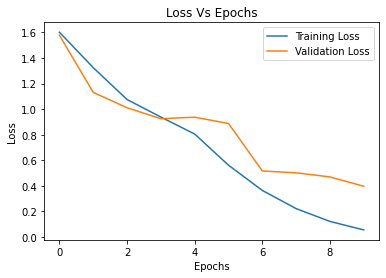

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [66]:
acc=model.evaluate(x_test, y_test)

10/10 [==============================] - 7s 673ms/step - loss: 0.3046 - accuracy: 0.9094
